In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trend_finder as tf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from imblearn.over_sampling import RandomOverSampler

# Run a test looking for stock price increases and decreases of percent, 30 days out
- Record 60 trading days before the trend
- use those 60 trading days as features

In [2]:
tesla = tf.Historydf('TSLA', 30, 5, 60)

In [4]:
tesla.df

,Open,Close,Volume
0,126.599335,125.806000,247117500
1,124.333336,125.235336,183079500
2,124.045334,133.455338,309177000
3,136.317337,136.665329,322344000
4,141.751999,134.279999,300954000
...,...,...,...
751,235.699997,239.759995,98595300
752,238.729996,232.960007,88197600
753,228.020004,225.600006,112484500
754,226.059998,219.220001,120237700


In [6]:
tesla.find_trends()

start index = 59, end index = 726


In [8]:
tesla.pretrends_df

,Open,Close,Volume,Buy/Sell
0,214.119995,215.240005,85907685.0,NaN
1,126.599335,125.806000,247117500.0,NaN
2,124.333336,125.235336,183079500.0,NaN
3,124.045334,133.455338,309177000.0,NaN
4,136.317337,136.665329,322344000.0,NaN
...,...,...,...,...
33415,258.029999,257.500000,131283400.0,NaN
33416,260.600006,261.769989,112267600.0,NaN
33417,276.489990,279.820007,119685900.0,NaN
33418,278.820007,282.480011,131530900.0,NaN


In [10]:
tesla.structure_data()

In [11]:
tesla.structured_df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Buy/Sell
0,0.989350,0.157168,0.135622,0.132883,0.249571,0.301246,0.205280,0.259231,0.335590,0.408272,...,0.038709,0.009811,0.215022,0.075601,0.130693,0.107867,0.069332,0.000000,0.135667,1
1,0.288420,0.248880,0.243855,0.457989,0.552818,0.376711,0.475717,0.615844,0.749223,0.665387,...,0.009811,0.215022,0.075601,0.130693,0.107867,0.069332,0.000000,0.135667,0.088655,1
2,0.248880,0.243855,0.457989,0.552818,0.376711,0.475717,0.615844,0.749223,0.665387,1.000000,...,0.248781,0.115357,0.168079,0.146235,0.109357,0.043007,0.172839,0.127849,0.000000,1
3,0.243855,0.457989,0.552818,0.376711,0.475717,0.615844,0.749223,0.665387,1.000000,0.865352,...,0.115357,0.168079,0.146235,0.109357,0.043007,0.172839,0.127849,0.000000,0.024700,1
4,0.457989,0.552818,0.376711,0.475717,0.615844,0.749223,0.665387,1.000000,0.865352,0.447973,...,0.168079,0.146235,0.109357,0.043007,0.172839,0.127849,0.000000,0.024700,0.023870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.364765,0.309250,0.248510,0.222875,0.277982,0.311046,0.247530,0.255613,0.274961,0.281737,...,0.639887,0.623992,1.000000,0.634288,0.713324,0.741057,0.618757,0.576444,0.344522,0
553,0.309250,0.248510,0.222875,0.277982,0.311046,0.247530,0.255613,0.274961,0.281737,0.216018,...,0.623992,1.000000,0.634288,0.713324,0.741057,0.618757,0.576444,0.344522,0.189711,0
554,0.239346,0.214656,0.267731,0.299575,0.238402,0.246186,0.264822,0.271348,0.208052,0.106385,...,1.000000,0.634288,0.713324,0.741057,0.618757,0.576444,0.344522,0.189711,0.250105,0
555,0.210259,0.262246,0.293438,0.233518,0.241143,0.259396,0.265789,0.203789,0.104205,0.093654,...,0.634288,0.713324,0.741057,0.618757,0.576444,0.344522,0.189711,0.250105,0.346537,0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes

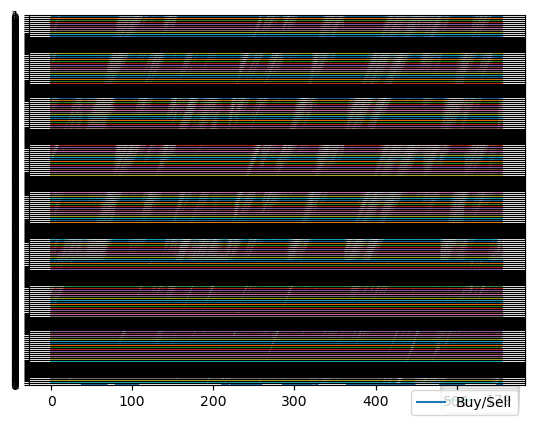

In [14]:
tesla.structured_df.plot(kind = 'line', subplots=True)